In [180]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [181]:
dataPr = pd.read_csv('dataset_pr.csv')

In [182]:
dataPr

,Tweet,HS,Abusive
0,cowok usaha lacak perhati lantas remeh perhati...,1,1
1,terlambat eluedan sarap gaul cigax jifla cal n...,0,1
2,kadang berfikir percaya tuhan jatuh berkalikal...,0,0
3,akunnku mata sipit lihat,0,0
4,kaum cebong kapir lihat dongok dongok hahahah,1,1
...,...,...,...
13164,bicara ndasmu mulut kate anjyng,1,1
13165,kasur enak kunyuk,0,1
13166,hati hati bisu gnnlagi bosan mengeluh xfxfxxaa,0,0
13167,bom real mudah deteksi bom kubur dahsyat ledak...,0,0


In [183]:
dataPr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    13125 non-null  object
 1   HS       13169 non-null  int64 
 2   Abusive  13169 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 308.8+ KB


In [184]:
dataPr.isnull().sum()

Tweet      44
HS          0
Abusive     0
dtype: int64

In [185]:
dataPr = dataPr.dropna()

VECTORIZEN

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
X = dataPr['Tweet']
y = dataPr[dataPr.columns[1:]].values

In [188]:
vectorizer = TfidfVectorizer(max_features=5000) 
X_vectorized = vectorizer.fit_transform(X)

In [189]:
X_vectorized

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 95944 stored elements and shape (13125, 5000)>

In [190]:
print(X_vectorized.shape)

(13125, 5000)


In [191]:
from tensorflow.keras.layers import TextVectorization

In [192]:
MAX_WORDS = 20000
MAX_SEQUENCE_LENGTH = 1800

In [193]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1800,
                               output_mode = 'int')

In [194]:
vectorizer.adapt(X.values)

In [195]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'jokowi',
 'presiden',
 'agama',
 'islam',
 'indonesia',
 'cebong',
 'lihat',
 'cina',
 'banget',
 'rakyat',
 'gubernur',
 'asing',
 'negara',
 'pakai',
 'kepala',
 'rezim',
 'daerah',
 'bicara',
 'kristen',
 'kerja',
 'komunis',
 'gantipresiden',
 'ekonomi',
 'dukung',
 'ahok',
 'pki',
 'salah',
 'bodoh',
 'anak',
 'amp',
 'budaya',
 'deh',
 'allah',
 'ulama',
 'anjing',
 'bilang',
 'kafir',
 'pemilihan',
 'pilih',
 'suka',
 'perintah',
 'org',
 'prabowo',
 'isu',
 'emang',
 'pei',
 'masuk',
 'nyata',
 'nama',
 'antek',
 'muslim',
 'laku',
 'bikin',
 'politik',
 'ajar',
 'anti',
 'xfxfxx',
 'kaya',
 'gitu',
 'kayak',
 'biar',
 'bom',
 'pimpin',
 'onta',
 'dr',
 'babi',
 'makan',
 'banci',
 'mata',
 'otak',
 'katolik',
 'hidup',
 'dasar',
 'yahudi',
 'umat',
 'ganti',
 'jalan',
 'hati',
 'aseng',
 'bohong',
 'kasih',
 'dungu',
 'lengser',
 'sialan',
 'sdh',
 'nusantara',
 'bubar',
 'beda',
 'sipit',
 'cinta',
 'nista',
 'manusia',
 'bani',
 'main',
 'paai',
 'bangsa',
 

In [196]:
vectorized_text = vectorizer(X.values)

In [197]:
vectorized_text

<tf.Tensor: shape=(13125, 1800), dtype=int64, numpy=
array([[ 679,  203, 3971, ...,    0,    0,    0],
       [1647,    1,  307, ...,    0,    0,    0],
       [ 612, 2425,  112, ...,    0,    0,    0],
       ...,
       [  79,   79,  293, ...,    0,    0,    0],
       [  63, 2822,  302, ...,    0,    0,    0],
       [ 473,  318, 1589, ...,    0,    0,    0]], dtype=int64)>

### Data Pipeline

In [198]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(13125)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [199]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [200]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [201]:
train_generator = train.as_numpy_iterator()

In [202]:
train_generator.next()

(array([[   42,   488, 13047, ...,     0,     0,     0],
        [   33,   120, 19817, ...,     0,     0,     0],
        [   46,  1507,   280, ...,     0,     0,     0],
        ...,
        [ 3530,  1766,  1713, ...,     0,     0,     0],
        [   25,    49,  6856, ...,     0,     0,     0],
        [  316,  1356,   876, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 1],
        [1, 1],
        [1, 0],
        [0, 1],
        [0, 0],
        [1, 1],
        [0, 0],
        [0, 0],
        [0, 0],
        [1, 0],
        [1, 0]], dtype=int64))

### Create Sequential Model

In [203]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [204]:
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS + 1, output_dim=32, input_length=MAX_SEQUENCE_LENGTH)) # Embedding Layer
model.add(LSTM(32, activation='tanh')) # Bidirectional LSTM Layer

# Feature extractor Fully connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

c:\Users\Abiyoso\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [205]:
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

In [206]:
model.build(input_shape=(None, 1800))

In [207]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 1800, 32)       │       640,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,754 (2.74 MB)

 Trainable params: 718,754 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [211]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
574/574 ━━━━━━━━━━━━━━━━━━━━ 181s 316ms/step - accuracy: 0.8650 - loss: 0.6772 - val_accuracy: 0.8746 - val_loss: 0.6774
Epoch 2/5
574/574 ━━━━━━━━━━━━━━━━━━━━ 180s 313ms/step - accuracy: 0.8632 - loss: 0.6754 - val_accuracy: 0.8678 - val_loss: 0.6742
Epoch 3/5
574/574 ━━━━━━━━━━━━━━━━━━━━ 169s 295ms/step - accuracy: 0.8696 - loss: 0.6741 - val_accuracy: 0.8670 - val_loss: 0.6729
Epoch 4/5
574/574 ━━━━━━━━━━━━━━━━━━━━ 177s 308ms/step - accuracy: 0.8618 - loss: 0.6721 - val_accuracy: 0.8598 - val_loss: 0.6778
Epoch 5/5
574/574 ━━━━━━━━━━━━━━━━━━━━ 181s 315ms/step - accuracy: 0.8657 - loss: 0.6717 - val_accuracy: 0.8659 - val_loss: 0.6737


In [212]:
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 800x500 with 0 Axes>

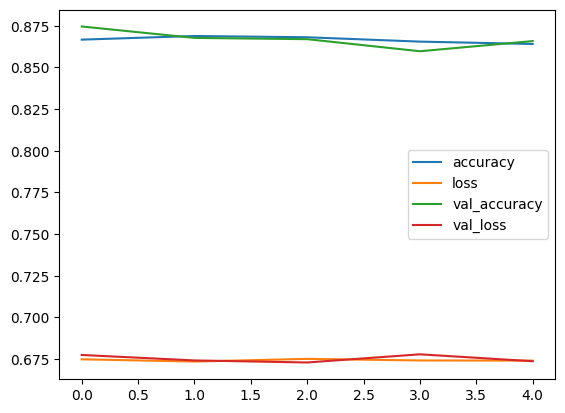

In [213]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show

### Make Predictions

In [237]:
input_text = vectorizer(['sialan lu, gua bunuh lu ya!!'])

In [238]:
res = model.predict(input_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [239]:
(res > 0.5).astype(int)

array([[1, 0]])

In [240]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [241]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [242]:
res.shape

(1, 2)

## Evaluasi

In [243]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [244]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [245]:
for batch in test.as_numpy_iterator(): 
    X_true, y_true = batch 
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━

In [246]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.41310974955558777, Recall:0.528265118598938, Accuracy:0.3658536672592163
